In [2]:
import seaborn as sns

In [4]:
planets=sns.load_dataset("planets")
df=planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [7]:
df.isnull().values.any()

True

In [6]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [8]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [11]:
kat_df=df.select_dtypes(include=["object"])
kat_df

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity
...,...
1030,Transit
1031,Transit
1032,Transit
1033,Transit


In [12]:
kat_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

<AxesSubplot:>

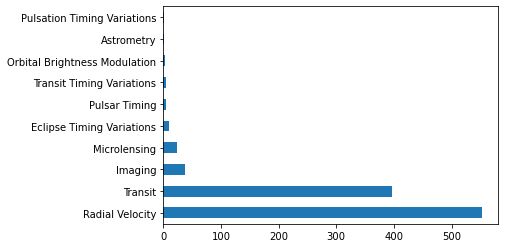

In [15]:
kat_df["method"].value_counts().plot.barh()

In [17]:
import seaborn as sns
diamonds=sns.load_dataset('diamonds')
df=diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [20]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [21]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

<AxesSubplot:>

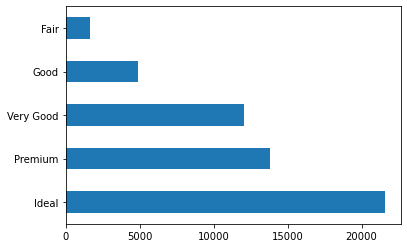

In [22]:
df["cut"].value_counts().plot.barh()

<AxesSubplot:>

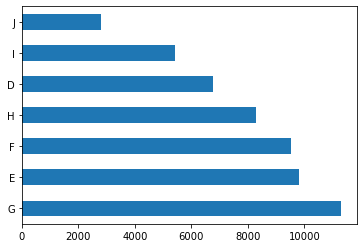

In [23]:
df["color"].value_counts().plot.barh()

In [25]:
#ordinal defintion
from pandas.api.types import CategoricalDtype

df.cut=df.cut.astype(CategoricalDtype(ordered=True))
df.dtypes


carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [27]:
df.cut.head(10)

0        Ideal
1      Premium
2         Good
3      Premium
4         Good
5    Very Good
6    Very Good
7    Very Good
8         Fair
9    Very Good
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [29]:
cut_cat_orders=["Fair","Good","Very Good","Premium","Ideal"]

In [30]:
df.cut=df.cut.astype(CategoricalDtype(categories=cut_cat_orders,ordered=True))

In [31]:
df.cut.head(10)

0        Ideal
1      Premium
2         Good
3      Premium
4         Good
5    Very Good
6    Very Good
7    Very Good
8         Fair
9    Very Good
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

<AxesSubplot:>

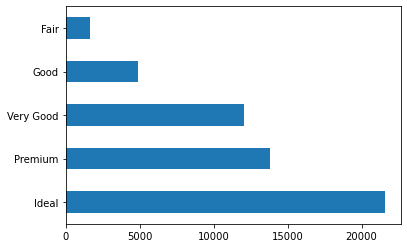

In [34]:
df["cut"].value_counts().plot.barh()

<AxesSubplot:>

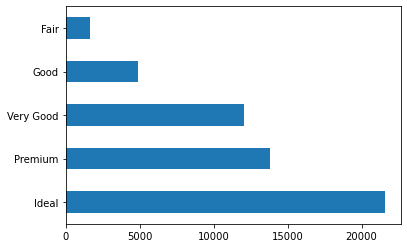

In [35]:
(df["cut"].
 value_counts().
 plot.barh())

<AxesSubplot:xlabel='cut'>

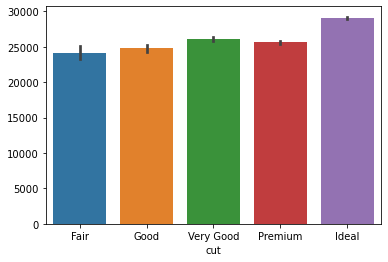

In [36]:
sns.barplot(x="cut",y=df.cut.index,data=df)

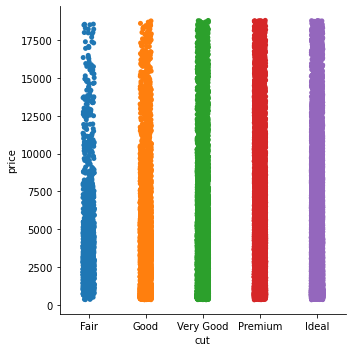

In [37]:
sns.catplot(x="cut",y="price",data=df)

<AxesSubplot:xlabel='cut', ylabel='price'>

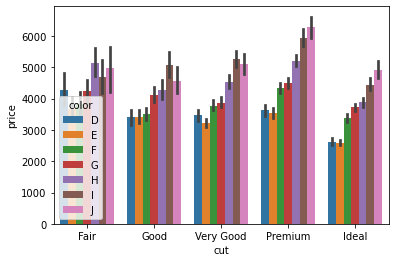

In [38]:
sns.barplot(x="cut",y="price",hue="color",data=df)

<AxesSubplot:xlabel='color', ylabel='price'>

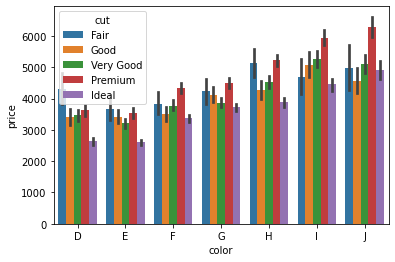

In [39]:
sns.barplot(x="color",y="price",hue="cut",data=df)

<AxesSubplot:xlabel='price'>

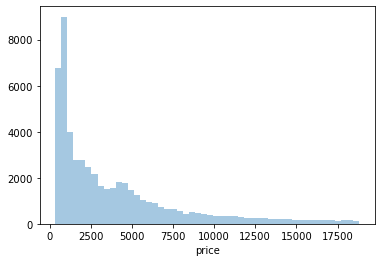

In [41]:
sns.distplot(df.price,kde=False)

<AxesSubplot:xlabel='x'>

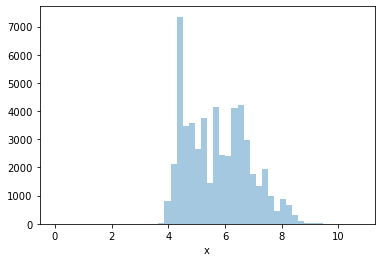

In [43]:
sns.distplot(df.x,kde=False)

<AxesSubplot:xlabel='y'>

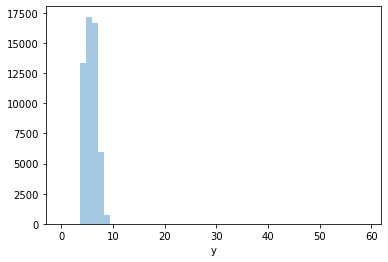

In [44]:
sns.distplot(df.y,kde=False)

<AxesSubplot:xlabel='z'>

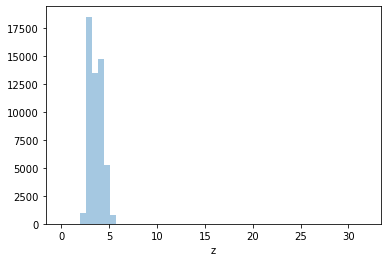

In [45]:
sns.distplot(df.z,kde=False)

In [47]:
max(df.z)

31.8

<AxesSubplot:xlabel='price'>

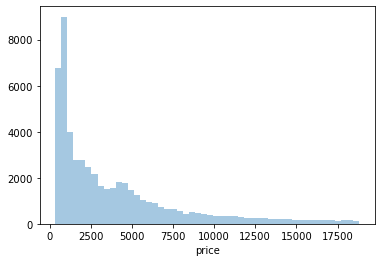

In [48]:
sns.distplot(df.price,kde=False)

<AxesSubplot:xlabel='price'>

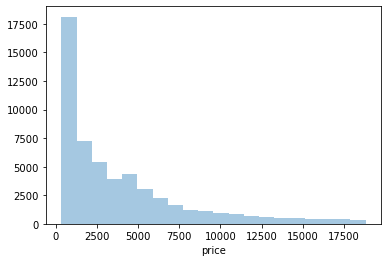

In [56]:
sns.distplot(df.price,bins=20,kde=False)

<AxesSubplot:xlabel='price', ylabel='Density'>

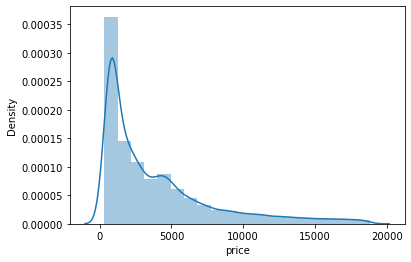

In [57]:
sns.distplot(df.price,bins=20,kde=False)

C:\Users\emrehan\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

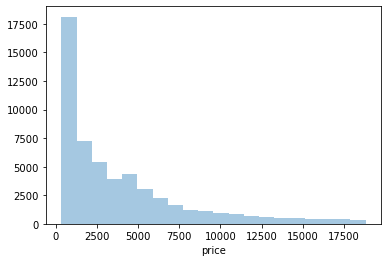

In [59]:
sns.distplot(df.price,bins=20,kde=False)

In [60]:
?sns.distplot

Signature:
sns.distplot(
    a=None,
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
    x=None,
)
Docstring:
DEPRECATED: Flexibly plot a univariate distribution of observations.

.. warning::
   This function is deprecated and will be removed in a future version.
   Please adapt your code to use one of two new functions:

   - :func:`displot`, a figure-level function with a similar flexibility
     over the kind of plot to draw
   - :func:`histplot`, an axes-level function for plotting histograms,
     including with kernel density smoothing

This function combines the matplotlib ``hist`` function (with automatic
calculation of a good default bin size) with the seaborn :func:`kdeplot`
and :func:`rugplot` functions. It can also fit ``scipy.stats``
distributions and plot the estimated PDF